In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
import importlib
# Set Jupyter theme
jtplot.style(theme='grade3', context='paper', ticks=True, grid=False)

# Configure inline figure format
%config InlineBackend.figure_format = 'retina'

# Update matplotlib font settings

plt.rcParams.update({'font.size': 12,  # Adjust font size as needed
                     "mathtext.fontset": 'cm',
                     "text.usetex": False,
                     "axes.labelcolor":  "gray",
                     "axes.edgecolor":  "gray",
                     "axes.spines.left":   True,  # display axis spines
                     "axes.spines.bottom": True,
                     "axes.spines.top":    False,
                     "axes.spines.right":  False,
                     "xtick.color":       "gray",
                     "ytick.color":     "gray",
                     "xtick.major.size":       0,
                     "ytick.major.size":     0,
                     "xtick.major.pad":       5,
                     "ytick.major.pad":     5,
                     "legend.fancybox":      True,
                     "legend.labelcolor":  "gray",
                     })  # Set font family for math text

# If you are reloading modules, you may need to use importlib.reload()
# importlib.reload(module_name)

In [2]:
import src.discounted_mdp
src.discounted_mdp = importlib.reload(src.discounted_mdp)
from src.discounted_mdp import run_mdp_sweep

no_mdp_seeds = 50
n_branches_list = [5]
mdp_sweep_params = {
    "seed": np.arange(no_mdp_seeds),
    "n_states": [100],
    "n_actions": [10],
    "gamma": [0.95],
    "r": [None],
    "r_scale": [100]
}
mdp_sweep = run_mdp_sweep("n_branches", n_branches_list, mdp_sweep_params)


In [3]:
k_list = [1, 5, 10, 20, 30]
T = 10
no_seeds = 1
initial_policy_list = ["zeros"]

In [4]:
from src import runner
# Reload the runner module if needed
runner = importlib.reload(runner)
# Initialize lists to store parameters, generators, and data

lazy_momentum_sweep = []
for mdps_no, mdps in enumerate(mdp_sweep):
    lazy_momentum = []
    base_log_dir_outer = f"__mdps_no_{mdps_no}"
    for k in k_list:
        sweep_params = {
            "seed": np.arange(no_seeds),
            "num_iter": [T],
            "inner_loop_lr": [0.5],
            "k": [k],
            "policy_improvement_type": ["PMD(+lazy_momentum)"],
            "save_logs": [True],
            "load_logs": [True],
            "experiment_name": ["when?__sweep_k"],
        }
        base_log_dir_inner = os.path.join(base_log_dir_outer, f"__k_{k}")
        lazy_momentum_k = runner.batch_run_alg(mdps, "initial_policy", initial_policy_list, "optimization", sweep_params,
                                               base_log_dir=base_log_dir_inner)
        lazy_momentum.append(lazy_momentum_k)
    lazy_momentum_sweep.append(lazy_momentum)

 Loaded data logs from '__mdps_no_0/__k_1/__mdp_0/__initial_policy_zeros/__seed_0'
 Loaded data logs from '__mdps_no_0/__k_1/__mdp_1/__initial_policy_zeros/__seed_0'
 Loaded data logs from '__mdps_no_0/__k_1/__mdp_2/__initial_policy_zeros/__seed_0'
 Loaded data logs from '__mdps_no_0/__k_1/__mdp_3/__initial_policy_zeros/__seed_0'
 Loaded data logs from '__mdps_no_0/__k_1/__mdp_4/__initial_policy_zeros/__seed_0'
 Loaded data logs from '__mdps_no_0/__k_1/__mdp_5/__initial_policy_zeros/__seed_0'
 Loaded data logs from '__mdps_no_0/__k_1/__mdp_6/__initial_policy_zeros/__seed_0'
 Loaded data logs from '__mdps_no_0/__k_1/__mdp_7/__initial_policy_zeros/__seed_0'
 Loaded data logs from '__mdps_no_0/__k_1/__mdp_8/__initial_policy_zeros/__seed_0'
 Loaded data logs from '__mdps_no_0/__k_1/__mdp_9/__initial_policy_zeros/__seed_0'
 Loaded data logs from '__mdps_no_0/__k_1/__mdp_10/__initial_policy_zeros/__seed_0'
 Loaded data logs from '__mdps_no_0/__k_1/__mdp_11/__initial_policy_zeros/__seed_0'
 L

In [5]:
from src import runner
# Reload the runner module if needed
runner = importlib.reload(runner)
# Initialize lists to store parameters, generators, and data

pmd_sweep = []
for mdps_no, mdps in enumerate(mdp_sweep):
    pmd = []
    base_log_dir_outer = f"__mdps_no_{mdps_no}"
    for k in k_list:
        sweep_params = {
            "seed": np.arange(no_seeds),
            "num_iter": [T],
            "inner_loop_lr": [0.5],
            "k": [k],
            "policy_improvement_type": ["PMD"],
            "save_logs": [True],
            "load_logs": [True],
            "experiment_name": ["when?__sweep_k"],
        }
        base_log_dir_inner = os.path.join(base_log_dir_outer, f"__k_{k}")
        pmd_k = runner.batch_run_alg(mdps, "initial_policy", initial_policy_list, "optimization", sweep_params,
                                     base_log_dir=base_log_dir_inner)
        pmd.append(pmd_k)
    pmd_sweep.append(pmd)

 Loaded data logs from '__mdps_no_0/__k_1/__mdp_0/__initial_policy_zeros/__seed_0'
 Loaded data logs from '__mdps_no_0/__k_1/__mdp_1/__initial_policy_zeros/__seed_0'
 Loaded data logs from '__mdps_no_0/__k_1/__mdp_2/__initial_policy_zeros/__seed_0'
 Loaded data logs from '__mdps_no_0/__k_1/__mdp_3/__initial_policy_zeros/__seed_0'
 Loaded data logs from '__mdps_no_0/__k_1/__mdp_4/__initial_policy_zeros/__seed_0'
 Loaded data logs from '__mdps_no_0/__k_1/__mdp_5/__initial_policy_zeros/__seed_0'
 Loaded data logs from '__mdps_no_0/__k_1/__mdp_6/__initial_policy_zeros/__seed_0'
 Loaded data logs from '__mdps_no_0/__k_1/__mdp_7/__initial_policy_zeros/__seed_0'
 Loaded data logs from '__mdps_no_0/__k_1/__mdp_8/__initial_policy_zeros/__seed_0'
 Loaded data logs from '__mdps_no_0/__k_1/__mdp_9/__initial_policy_zeros/__seed_0'
 Loaded data logs from '__mdps_no_0/__k_1/__mdp_10/__initial_policy_zeros/__seed_0'
 Loaded data logs from '__mdps_no_0/__k_1/__mdp_11/__initial_policy_zeros/__seed_0'
 L

In [6]:
from src import runner
# Reload the runner module if needed
runner = importlib.reload(runner)
# Initialize lists to store parameters, generators, and data
pi_sweep = []

for mdps_no, mdps in enumerate(mdp_sweep):
    base_log_dir = f"__mdps_no_{mdps_no}"
    sweep_params = {
        "seed": np.arange(no_seeds),
        "num_iter": [T],
        "inner_loop_lr": [0.5],
        "policy_improvement_type": ["PI"],
        "save_logs": [True],
        "load_logs": [True],
        "experiment_name": ["when?__sweep_k"],
    }
    pi = runner.batch_run_alg(mdps, "initial_policy", initial_policy_list, "optimization", sweep_params,
                              base_log_dir=base_log_dir)
    pi_sweep.append(pi)

 Loaded data logs from '__mdps_no_0/__mdp_0/__initial_policy_zeros/__seed_0'
 Loaded data logs from '__mdps_no_0/__mdp_1/__initial_policy_zeros/__seed_0'
 Loaded data logs from '__mdps_no_0/__mdp_2/__initial_policy_zeros/__seed_0'
 Loaded data logs from '__mdps_no_0/__mdp_3/__initial_policy_zeros/__seed_0'
 Loaded data logs from '__mdps_no_0/__mdp_4/__initial_policy_zeros/__seed_0'
 Loaded data logs from '__mdps_no_0/__mdp_5/__initial_policy_zeros/__seed_0'
 Loaded data logs from '__mdps_no_0/__mdp_6/__initial_policy_zeros/__seed_0'
 Loaded data logs from '__mdps_no_0/__mdp_7/__initial_policy_zeros/__seed_0'
 Loaded data logs from '__mdps_no_0/__mdp_8/__initial_policy_zeros/__seed_0'
 Loaded data logs from '__mdps_no_0/__mdp_9/__initial_policy_zeros/__seed_0'
 Loaded data logs from '__mdps_no_0/__mdp_10/__initial_policy_zeros/__seed_0'
 Loaded data logs from '__mdps_no_0/__mdp_11/__initial_policy_zeros/__seed_0'
 Loaded data logs from '__mdps_no_0/__mdp_12/__initial_policy_zeros/__seed

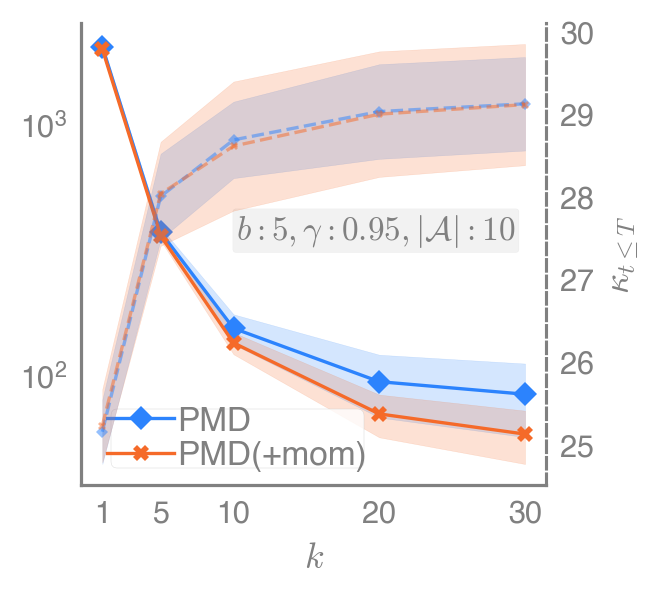

In [28]:
from collections import defaultdict
import src.markovchain
src.markovchain = importlib.reload(src.markovchain)
import src.mrp
src.mrp = importlib.reload(src.mrp)
import src.mdp
src.mdp = importlib.reload(src.mdp)
from src import plot_random_mdps
import colormaps as cmaps
plot_random_mdps = importlib.reload(plot_random_mdps)
%matplotlib inline
initial_policy = 0
T = 10
newcmap3 = cmaps.WhiteGreen.shift(0.25).cut(0.25, "right").cut(0.25, "left")
newcmap2 = cmaps.cet_l_kbc_r.shift(0.25).cut(0.5, "right")
newcmap1 = cmaps.WhiteYellowOrangeRed.shift(0.25).cut(0.25, "right").cut(0.25, "left")

labels = []
annotations = []
mdps_no = 0
mdps = mdp_sweep[mdps_no]
b = n_branches_list[mdps_no]

labels = [f"PMD", f"PMD(+mom)"]
nA_label = r'\mathcal{A}'
annotation = f"$b:{b}, \gamma:{0.95}, |{nA_label}|:{10}$"
data = [pmd_sweep[mdps_no], lazy_momentum_sweep[mdps_no]]
alg_cmaps = [newcmap2, newcmap1]
with_k = [True, True]
markers = ["D", "X"]
y_label = r'$\text{Regret}_T$'
y_twin_label = r'${\kappa}_{t \leq T}$'
figname="when__d__rmdp_sweep_k"
x_label=r'$k$'
(mean_mdp_seeds, std_mdp_seeds,
 mean_cond_no_seeds, std_cond_no_seeds) = plot_random_mdps.calculate_metrics_sweep_k(data=data, mdps=mdps, no_seeds=no_seeds, with_k=with_k, initial_policy=initial_policy, T=T, sweep_dim_list=k_list)
plot_random_mdps.plot_metrics_sweep_k(mean_mdp_seeds, std_mdp_seeds, mean_cond_no_seeds, std_cond_no_seeds,
                              x=k_list, labels=labels, alg_cmaps=alg_cmaps, markers=markers, legend_loc='center right', legend_bbox=(0.6, 0.1),
                              annotation=annotation, 
                              labelsize=13, textsize=12,
                              legendsize=12,
                              ticklabelsize=11,
                              x_label=x_label,
                                      # y_label=y_label, 
                                      y_twin_label=y_twin_label, log_scale=True, twin_log_scale=False,  y_twin_lims=None,
                                      savefig=True, figname=figname, offset_annot_x=1/3, offset_annot_y=7/8)


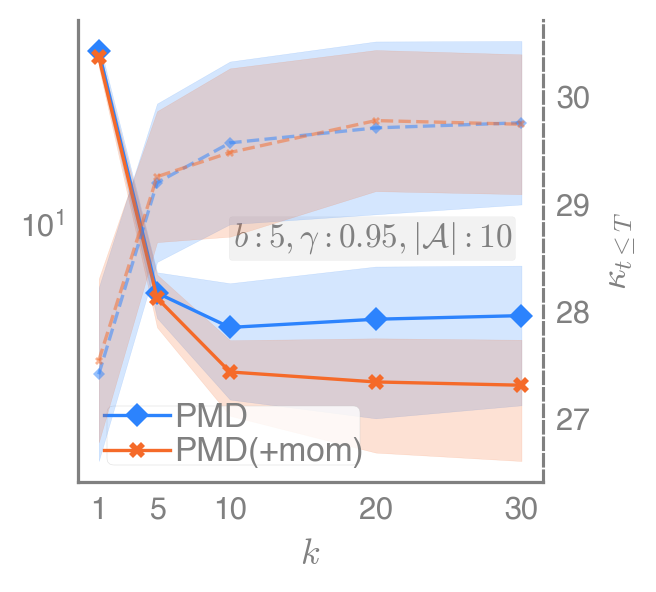

In [8]:
from collections import defaultdict
import src.markovchain
src.markovchain = importlib.reload(src.markovchain)
import src.mrp
src.mrp = importlib.reload(src.mrp)
import src.mdp
src.mdp = importlib.reload(src.mdp)
from src import plot_random_mdps
import colormaps as cmaps
plot_random_mdps = importlib.reload(plot_random_mdps)
%matplotlib inline
initial_policy = 0
T = 10
newcmap3 = cmaps.WhiteGreen.shift(0.25).cut(0.25, "right").cut(0.25, "left")
newcmap2 = cmaps.cet_l_kbc_r.shift(0.25).cut(0.5, "right")
newcmap1 = cmaps.WhiteYellowOrangeRed.shift(0.25).cut(0.25, "right").cut(0.25, "left")

labels = []
annotations = []
mdps_no = 0
mdps = mdp_sweep[mdps_no]
b = n_branches_list[mdps_no]

labels = [f"PMD", f"PMD(+mom)"]
nA_label = r'\mathcal{A}'
annotation = f"$b:{b}, \gamma:{0.95}, |{nA_label}|:{10}$"
data = [pmd_sweep[mdps_no], lazy_momentum_sweep[mdps_no]]
alg_cmaps = [newcmap2, newcmap1]
with_k = [True, True]
markers = ["D", "X"]
y_label = r'$\text{Regret}_T$'
y_twin_label = r'${\kappa}_{t \leq T}$'
figname="when__d__rmdp_sweep_k_final"
x_label=r'$k$'
(mean_mdp_seeds, std_mdp_seeds,
 mean_cond_no_seeds, std_cond_no_seeds) = plot_random_mdps.calculate_metrics_sweep_k(data=data, mdps=mdps, no_seeds=no_seeds, with_k=with_k, initial_policy=initial_policy, T=T, final=True,sweep_dim_list=k_list)
plot_random_mdps.plot_metrics_sweep_k(mean_mdp_seeds, std_mdp_seeds, mean_cond_no_seeds, std_cond_no_seeds,
                                      x=k_list, labels=labels, alg_cmaps=alg_cmaps, markers=markers, legend_loc='center right', legend_bbox=(0.6, 0.1),
                                      annotation=annotation,
                                      labelsize=13, textsize=12,
                                      legendsize=12,
                                      ticklabelsize=11,
                                      x_label=x_label,
                                      # y_label=y_label, 
                                      y_twin_label=y_twin_label, log_scale=True, twin_log_scale=False,  y_twin_lims=None,
                                      savefig=True, figname=figname, offset_annot_x=1/3, offset_annot_y=7/8)


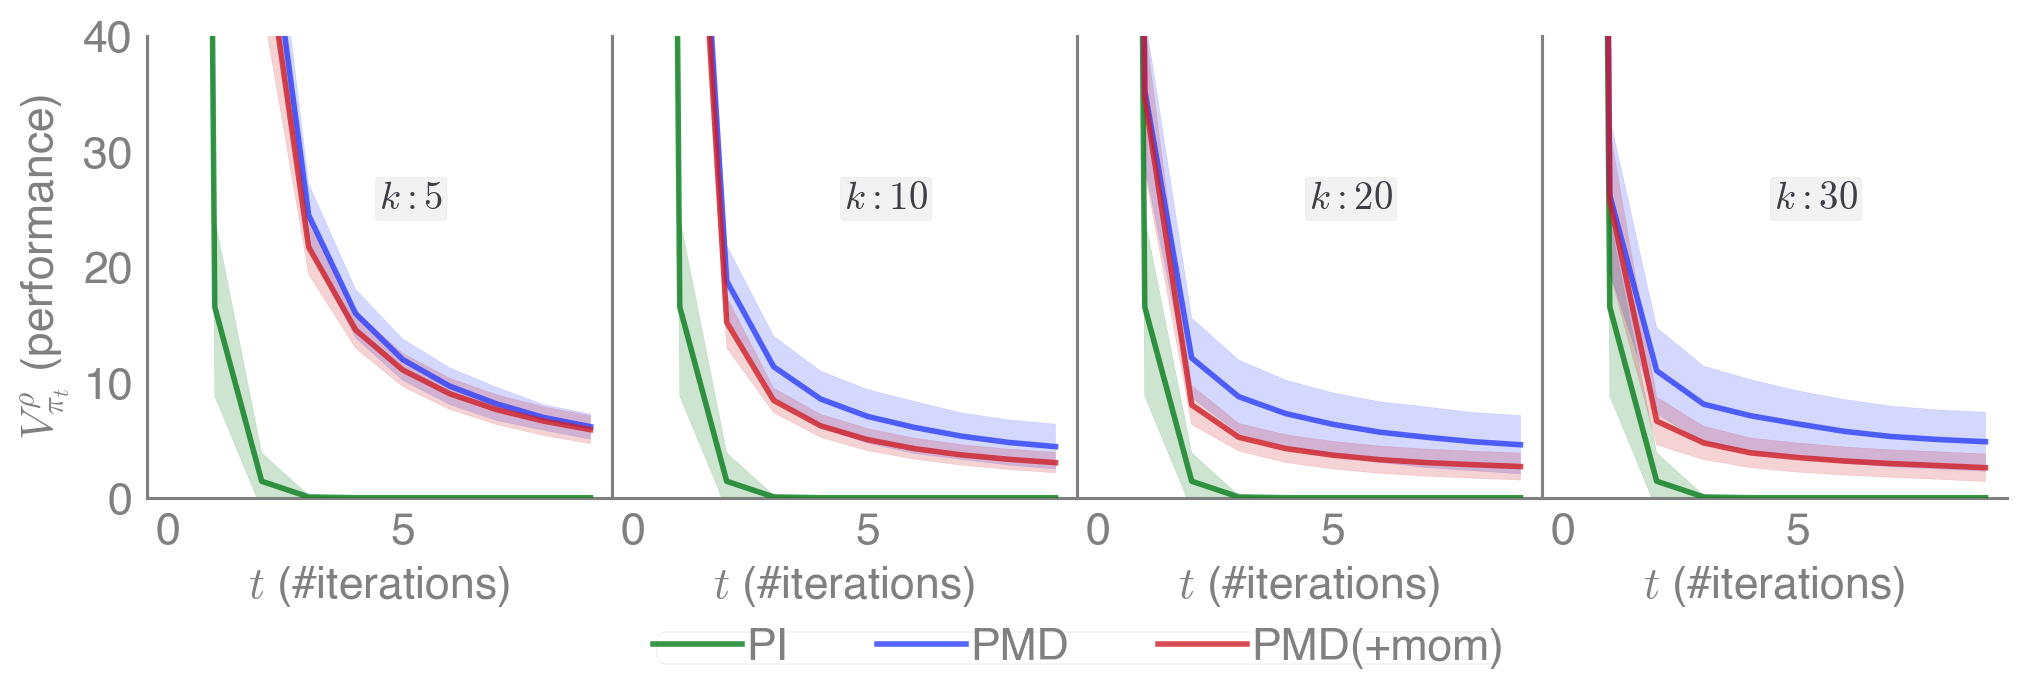

In [25]:
import src.plot_tiny_mdps

src.plot_tiny_mdps = importlib.reload(src.plot_tiny_mdps)
from src.plot_tiny_mdps import plot_learning_curves2
import colormaps as cmaps
initial_policy = 0

newcmap3 = cmaps.WhiteGreen.shift(0.25).cut(0.25, "right").cut(0.25, "left")
newcmap2 = cmaps.cet_l_kbc_r.shift(0.25).cut(0.5, "right")
newcmap1 = cmaps.WhiteYellowOrangeRed.shift(0.25).cut(0.25, "right").cut(0.25, "left")

cmaps = [newcmap3, newcmap2, newcmap1]
data_list = []
labels_list = []
axline_data_list = []
Ts = [10, 10, 10, 10, 10]
data_list_tau = []
labels_tau = []
axline_data_tau = []
for kk, k in enumerate(k_list[1:]):
    data_list_tau.append([
                          pi_sweep[0][2],
                          pmd_sweep[0][kk+1][2],
                          lazy_momentum_sweep[0][kk+1][2]])
    axline_data_tau.append(pmd_sweep[0][kk+1][1][0][initial_policy][0].v_star__rho)
    labels_tau.append([
        f"PI",
                       f"PMD", f"PMD(+mom)"])
data_list = [data_list_tau]
labels_list = [labels_tau]
axline_data_list = [axline_data_tau]
figname=f"when__d__rmdp_sweep_k_learning_curves"

plot_learning_curves2(data_list, labels_list, x_list=k_list[1:], annot_label=f"k",axline_data_list=axline_data_list,
                      y_list=[0], n_seeds=no_mdp_seeds,cmaps=cmaps,
                      Ts=[Ts], legendsize=16, ticklabelsize=11,
                      textsize=14,labelsize=16, legend_bbox=(-0.1, -0.3),
                      savefig=True, figname=figname, ylim_list=[(0,40),(0,10), (0,5), (0,2), (0,1)],
                      )


In [15]:
len(mdp_sweep)

1

In [14]:
len(pmd_sweep[mdps_no][0][2])

50